# Importing the libraries

In [29]:
import re
import nltk
import numpy as np
import pandas as pd
nltk.download('punkt')
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to C:\Users\Deeksha
[nltk_data]     Kotian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Importing the Dataset

In [30]:
df=pd.read_csv('Elon_musk.csv',encoding = "ISO-8859-1")
df.head() #Retrieving the first 5 rows.

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [31]:
df.shape #dimension of the dataset.

(1999, 2)

In [32]:
df.drop('Unnamed: 0',axis=1,inplace=True) #Dropping the unnamed column as we dont need them.

In [33]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [35]:
type(df['Text'][0]) #Checking if the each record of the Text column is 'str' object so that it's easier for us to go ahead 
#with the text cleaning steps.

str

In [36]:
#Clean the text
#Create a function to clean the tweets
stemmer= PorterStemmer()
def clean_text(text):
    text=re.sub(r'@[A-Za-z0-9]+', '',text) #Removed @mentions
    text=re.sub(r'#', '',text) #Removing #symbols
    text=re.sub(r'RT[\s]+', '',text) #Removing RT
    text=re.sub(r'https?:\/\/\S+','',text) #Removes the hyperlink
    text=text.lower()
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text=' '.join(text)    
    return text

In [37]:
df['Text']=df['Text'].apply(clean_text)

In [38]:
df

,Text
0,im alien
1,_aa_carmack ray trace cyberpunk hdr next-level...
2,great interview!
3,doge underestim
4,congratul tesla china amaz execut last year. n...
...,...
1994,"true, sound surreal, neg propaganda still &amp..."
1995,make sure read ur term &amp; condit click accept!
1996,samwis gamge
1997,altho dumb dumber <u+0001f525><u+0001f525>


In [39]:
# Create a function to get the subjectivity

In [40]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity # TextBlob aims to provide access to common text-processing operations through a
#familiar interface.Return the subjectivity score as a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very
#subjective.Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity
#means that the text contains personal opinion rather than factual information. 

In [41]:
#Create a function to get the polarity

In [42]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity #Returns the polarity score as a float within the range [-1.0, 1.0]

In [43]:
#Create those columns:
df['Subjectivity']=df['Text'].apply(getsubjectivity) #Calling the function applying it on the each tweet.
df['Polarity']=df['Text'].apply(getPolarity)

In [44]:
df

,Text,Subjectivity,Polarity
0,im alien,0.750000,-0.250000
1,_aa_carmack ray trace cyberpunk hdr next-level...,0.000000,0.000000
2,great interview!,0.750000,1.000000
3,doge underestim,0.000000,0.000000
4,congratul tesla china amaz execut last year. n...,0.188889,0.260417
...,...,...,...
1994,"true, sound surreal, neg propaganda still &amp...",0.443333,0.186667
1995,make sure read ur term &amp; condit click accept!,0.888889,0.625000
1996,samwis gamge,0.000000,0.000000
1997,altho dumb dumber <u+0001f525><u+0001f525>,0.500000,-0.375000


## Plot word cloud

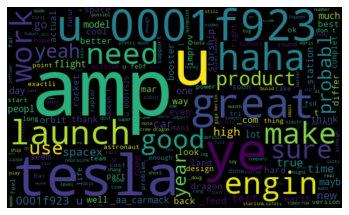

In [47]:
allWords=' '.join([twts for twts in df['Text']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

##### From the above word cloud we see that amp, tesla is used a lot in his tweets.

## Create a function to compute the negative, neutral and positive analysis:

In [48]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

In [49]:
df['Analysis']=df['Polarity'].apply(getAnalysis)

###### In the above block of code we are using the polarity scores and computing whether the score is positive negative or neutral.

In [50]:
df

,Text,Subjectivity,Polarity,Analysis
0,im alien,0.750000,-0.250000,Negative
1,_aa_carmack ray trace cyberpunk hdr next-level...,0.000000,0.000000,Neutral
2,great interview!,0.750000,1.000000,Positive
3,doge underestim,0.000000,0.000000,Neutral
4,congratul tesla china amaz execut last year. n...,0.188889,0.260417,Positive
...,...,...,...,...
1994,"true, sound surreal, neg propaganda still &amp...",0.443333,0.186667,Positive
1995,make sure read ur term &amp; condit click accept!,0.888889,0.625000,Positive
1996,samwis gamge,0.000000,0.000000,Neutral
1997,altho dumb dumber <u+0001f525><u+0001f525>,0.500000,-0.375000,Negative


## Print all of the positive tweets:

In [51]:
j=1
sortedDF=df.sort_values(by=['Polarity']) #sort the values in terms of ascening order by their polarity
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Text'][i])
        print()
        j=j+1

1)great interview!

2)congratul tesla china amaz execut last year. next even more!!

3)happi new year ox!

4)_ haha thank :)

5)it get real

6)definit issues, sentenc seem bit high

7)true power haha

8): nasa select falcon heavi launch first two element lunar gateway togeth one mission!

9)seem bit high

10)wow

11)_7_42 cute <u+0001f495>

12)extrem mislead image, doesnt reflect true time cost peopl rain &amp; pain

13)it fun crypto!

14)true

15)easy. two decad intens work. look old notes, emails, texts.

16)read ? it great!!

17)_ sure

18)great thing restaur get hang strangers! - sjm

19)much wow!

20)_bickett said, ship land burn clear solution. great

21)_ _bickett still use hot ga maneuv (rcs) thrusters,

22)_bickett higher isp

23)it true!

24)_bickett yeah. default, engin least lever arm would shut 3 good.

25)high sea &amp; wind

26)__ neuralink work super hard ensur implant safeti &amp; close commun

27): announc first commerci astronaut mission orbit earth aboard drago

## Print the negative tweets:

In [52]:
j=1
sortedDF_=df.sort_values(by=['Polarity'],ascending='False') #sort the values in terms of descending order by their polarity
for i in range(0,sortedDF_.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF_['Text'][i])
        print()
        j=j+1     

1)im alien

2)frodo underdoge, thought would fail, all.

3)_ starlink staggeringli difficult technic &amp; econom endeavor. however,

4)everyon tesla receiv stock. comp stock/options, take table. that your missing.

5)becom meme, destroy short

6)dumb

7)tough one

8): mission enabl access everyday peopl dream go space

9)_feed earth small &amp; smaller still

10)stalks. car guess drive direct base obstacl sees, context &amp; nav map.

11)[some tyranny]. also, road hell mostli pave bad intentions.

12): spacex rideshar offer provid increas access space small satellit oper seek reliable, afford rid

13): due unfavor weather, stand today' launch; team continu countdown t-30 seco

14)launch mani small satellit wide rang custom tomorrow. excit offer low-cost access

15)would probabl mean civil gr

16)batteri cell product fundament rate-limit slow sustain energi future. import pr

17)two engin need slight repairs, switch

18)hate say it, might true

19)yes, long

20)catapult high air &a

## Plot the polarity and subjectivity

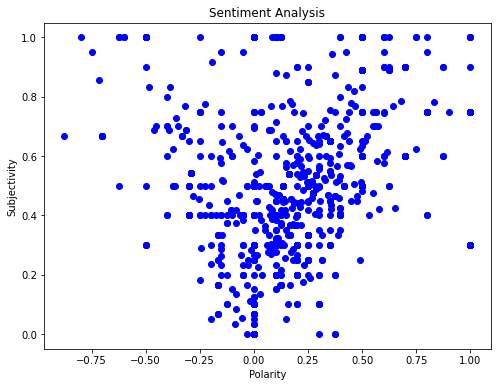

In [53]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

##### As we can see that most of the tweets lie on the positive side of the polarity axis we can say that most of the tweets are positive.

## Get the percentage of the positive tweets:

In [56]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Text']
round((ptweets.shape[0]/df.shape[0])*100,1)

34.7

## Get the percentage of negative tweets


In [57]:
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Text']
round((ntweets.shape[0]/df.shape[0])*100,1)

8.6

## Show the value counts:

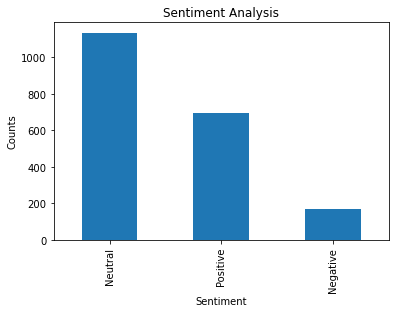

In [59]:
df['Analysis'].value_counts()

#plot andd visualise the count:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()